#  What is the top domestic grossing genre?

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mgross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [3]:
mgross_df.keys()

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [7]:
mgross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
mgross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
mgross_df['total_gross'] = mgross_df['domestic_gross'] + mgross_df['foreign_gross']

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [6]:
mgross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


how many missing values per column 

In [6]:
mgross_df.isna().sum() 

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

what the percentage is of missing values per column

In [7]:
mgross_df.isna().sum() / len(mgross_df)

title             0.000000
studio            0.001476
domestic_gross    0.008267
foreign_gross     0.398583
year              0.000000
dtype: float64

dropping the foreign gross column because it has the most missing values

In [8]:
mgross_df.drop(['foreign_gross'], axis = 1, inplace = True)

In [9]:
mgross_df.isna().sum()

title              0
studio             5
domestic_gross    28
year               0
dtype: int64

In [10]:
mgross_df.dropna(subset = ['studio', 'domestic_gross'], inplace = True)

checking to see if there are any duplicated rows

In [11]:
mgross_df.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [12]:
dup_mgross = mgross_df[mgross_df.duplicated()]
print(len(dup_mgross))

0


In [13]:
mgross_df.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


In [14]:

title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [15]:
title_basics_df.keys()

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [16]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [17]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [18]:
title_basics_df.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [19]:
title_basics_df.drop(['runtime_minutes'], axis = 1, inplace = True)

In [20]:
title_basics_df.head()

,tconst,primary_title,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"


joining title_basics with movie_gross

In [21]:
mgross_df.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


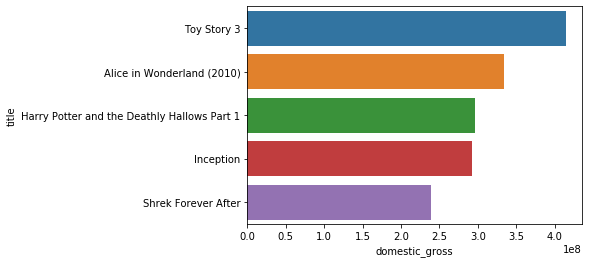

In [22]:
sns.barplot(x = 'domestic_gross', y = 'title', data = mgross_df.head())


In [23]:
top_studio = mgross_df.groupby(by = 'studio').sum().reset_index()

In [24]:
top_studio.sort_values(by = ['domestic_gross'], inplace= True, ascending= False)

Text(0.5, 1.0, 'Top Movie Studio')

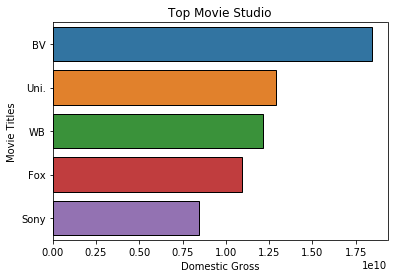

In [25]:
sns.barplot(x = 'domestic_gross', y = 'studio', data = top_studio[0:5], edgecolor = 'black')
plt.xlabel('Domestic Gross')
plt.ylabel('Movie Titles')
plt.title('Top Movie Studio')

Text(0.5, 1.0, 'Top Movie Studio')

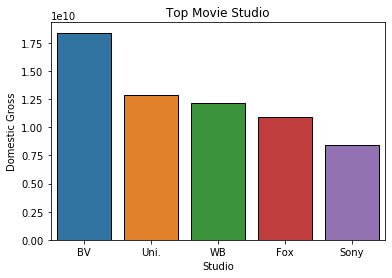

In [34]:

sns.barplot(x = 'studio', y = 'domestic_gross',data= top_studio.head(), edgecolor = 'black')

plt.xlabel('Studio')
plt.ylabel('Domestic Gross')
plt.title('Top Movie Studio')

In [27]:
top_studio.head()

,studio,domestic_gross,year
36,BV,1.841903e+10,213451
236,Uni.,1.290239e+10,296082
244,WB,1.216805e+10,281941
93,Fox,1.094950e+10,273882
213,Sony,8.459683e+09,219565
